<a href="https://colab.research.google.com/github/PengjunHou/CSE437-RL/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [46]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -694
Episode 2: total reward = -1288
Episode 3: total reward = -892
Episode 4: total reward = -991
Episode 5: total reward = -694


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [65]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 10000      # number of episodes to run
max_steps = 100     # safety cap

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

print(f"n_states: {n_states}")
print(f"n_actions: {n_actions}")



n_states: 48
n_actions: 4


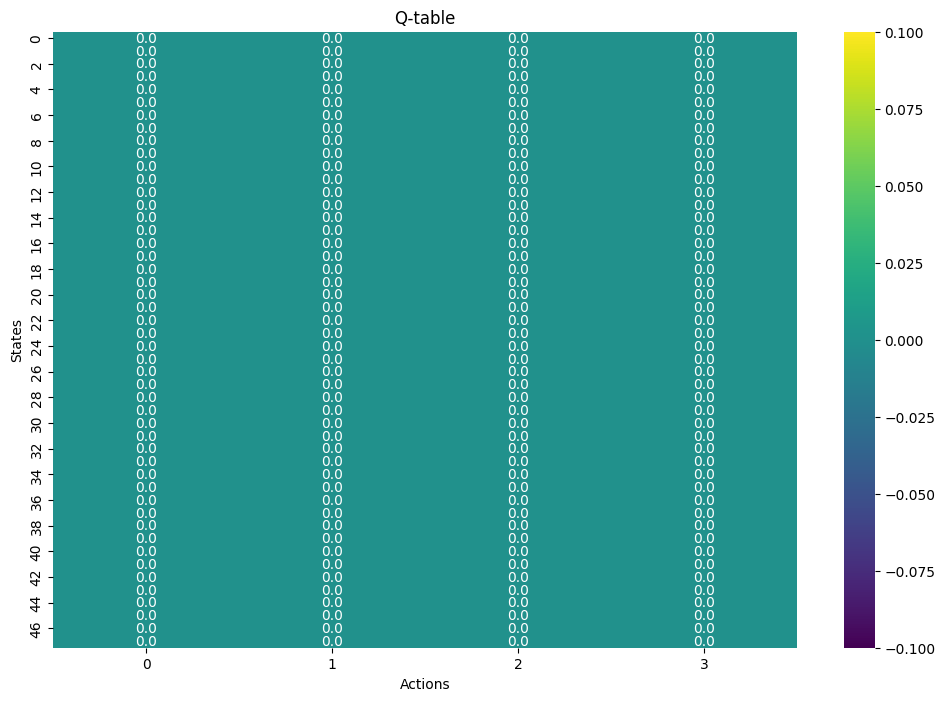

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

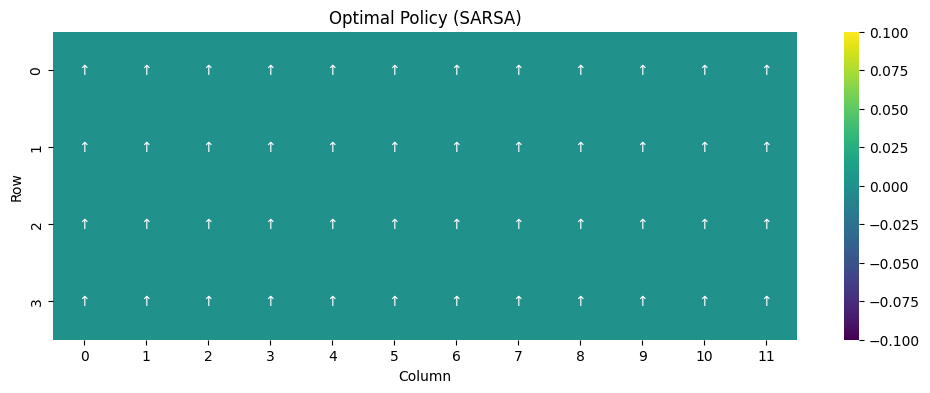

In [49]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title(f"Optimal Policy ({title})")
  plt.show()
plot_policy(Q)

In [50]:
# Greedy Policy
def Greedy_plocy(state, Q_table):
  action = np.argmax(Q_table[state], axis = 0)
  # print(f"Greedy Policy, state: {state}, action:{action}, Q value {Q_table[state]}")
  return action

# Epsilon_Greedy Policu
def Epsilon_greedy_policy(state, Q_table, epsilon = 0.1):
  rand_v = np.random.rand()
  if rand_v < epsilon:
    action = env.action_space.sample()
  else:
    action = Greedy_plocy(state, Q_table)
  return action

# SARSA Policy
def SARSA_policy(state, Q_table):
  pass

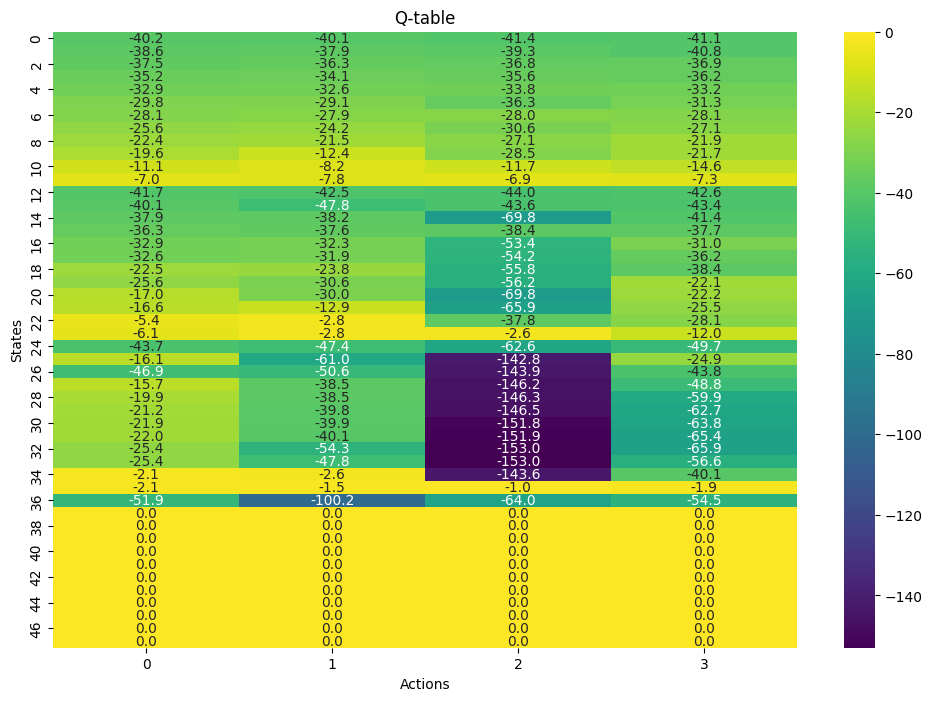

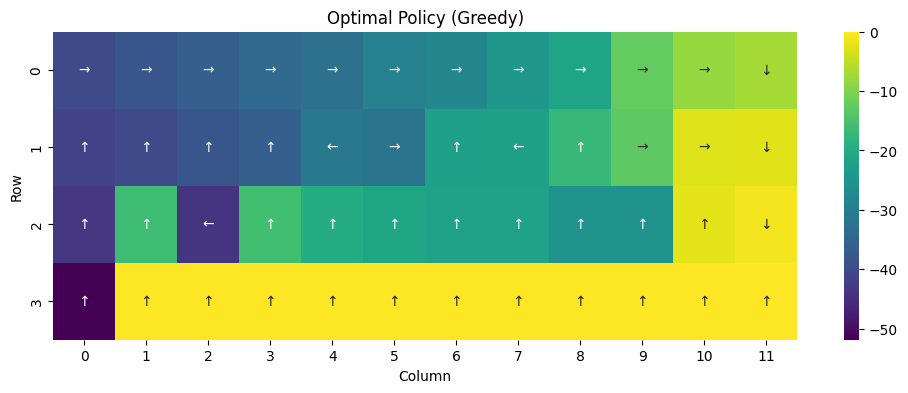

In [57]:
run_env('Greedy')

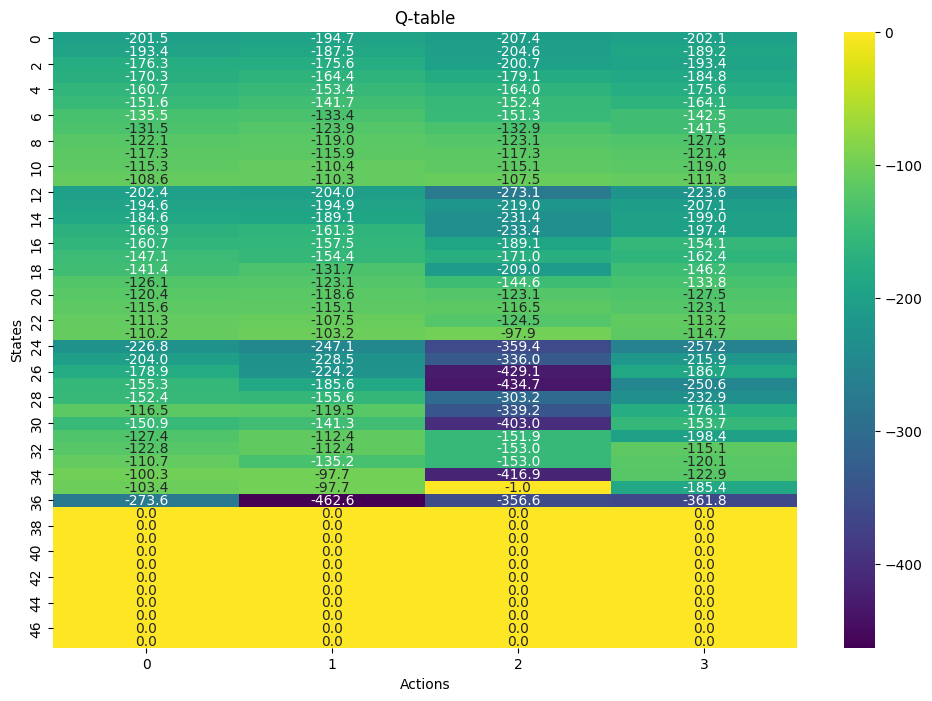

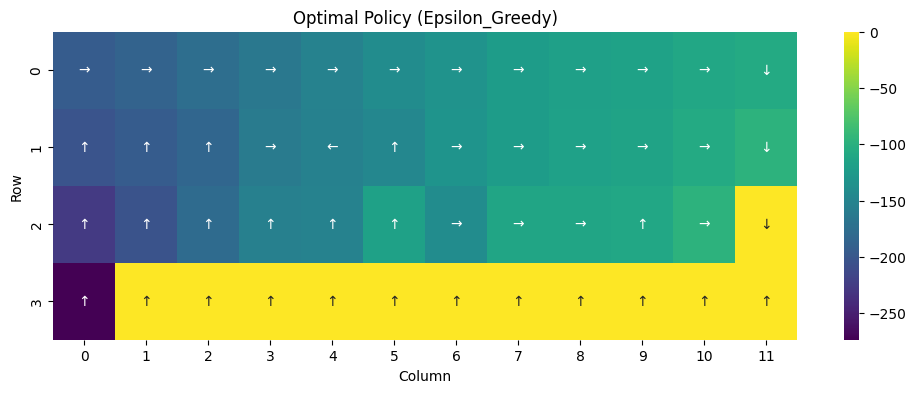

In [58]:
run_env('Epsilon_Greedy')

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

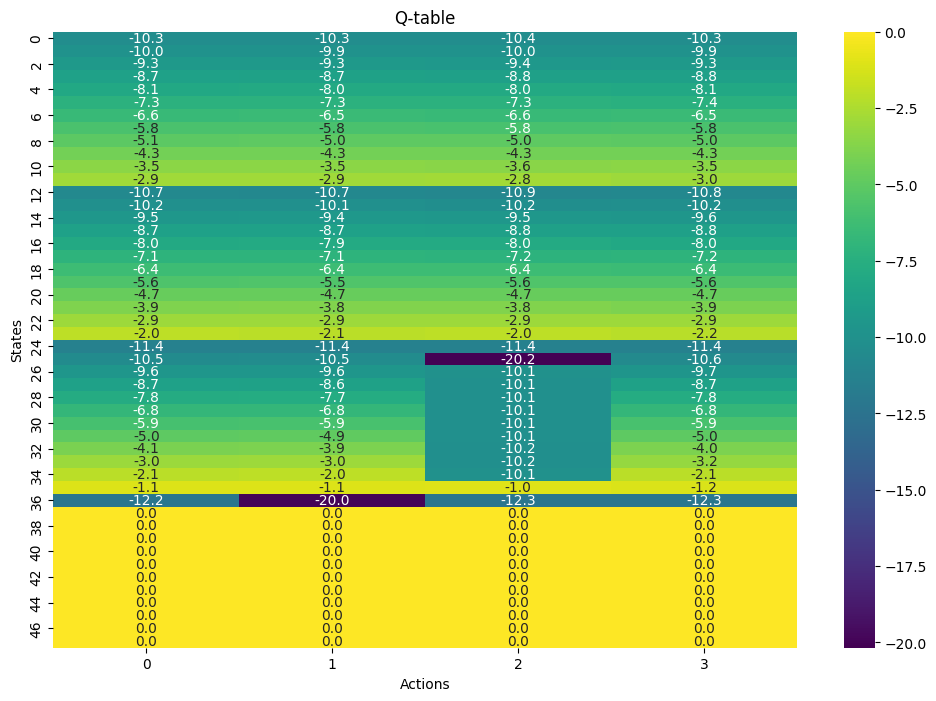

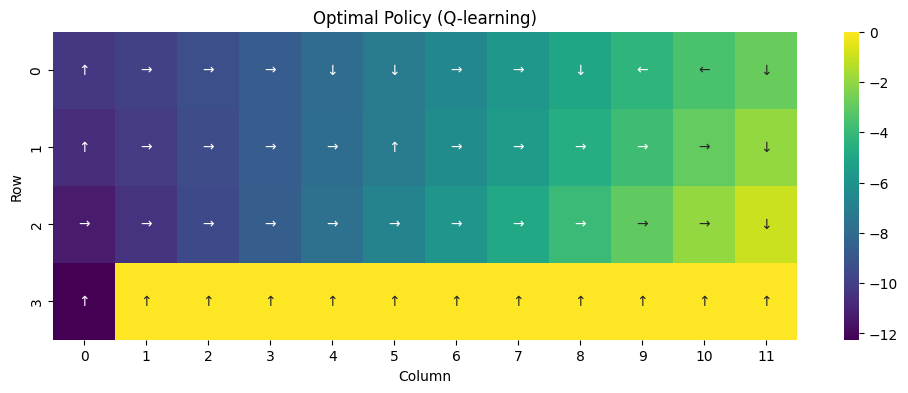

In [68]:
def Q_learning_policy(state, Q, epsilon = 0.2):
  # rand_v = np.random.rand()
  # if rand_v < epsilon:
  #   action = env.action_space.sample()
  # else:
  #   action = np.argmax(Q[state], axis = 0)
  action = np.argmax(Q[state], axis = 0)
  return action

Q = np.zeros((n_states, n_actions))
def run_env(policy = 'Q-learning'):
  for episode in range(n_episodes):
      state, info = env.reset()
      done = False
      total_reward = 0

      for step in range(max_steps):
          # Random policy: sample an action uniformly
          # action = env.action_space.sample()
          if policy == 'Random':
            action = env.action_space.sample()
          elif policy == 'Greedy':
            action = Greedy_plocy(state, Q)
          elif policy == 'Epsilon_Greedy':
            action = Epsilon_greedy_policy(state, Q)
          elif policy == 'SARSA':
            action = SARSA_policy(state, Q)
          elif policy == 'Q-learning':
            action = Q_learning_policy(state, Q)

          next_state, reward, terminated, truncated, info = env.step(action)
          total_reward += reward
          if policy == 'Q-learning':
            Q_max = np.max(Q[next_state])
            Q[state][action] = Q[state][action] + learning_rate * (reward + discount_factor * Q_max - Q[state][action])
          elif policy == 'SARSA':

          else:
            Q[state][action] = reward + np.mean(Q[next_state])
          state = next_state


          if terminated or truncated:
              break

      # print(f"Episode {episode+1}: total reward = {total_reward}")

  env.close()
  plot_Q(Q)
  plot_policy(Q, title = policy)

run_env('Q-learning')

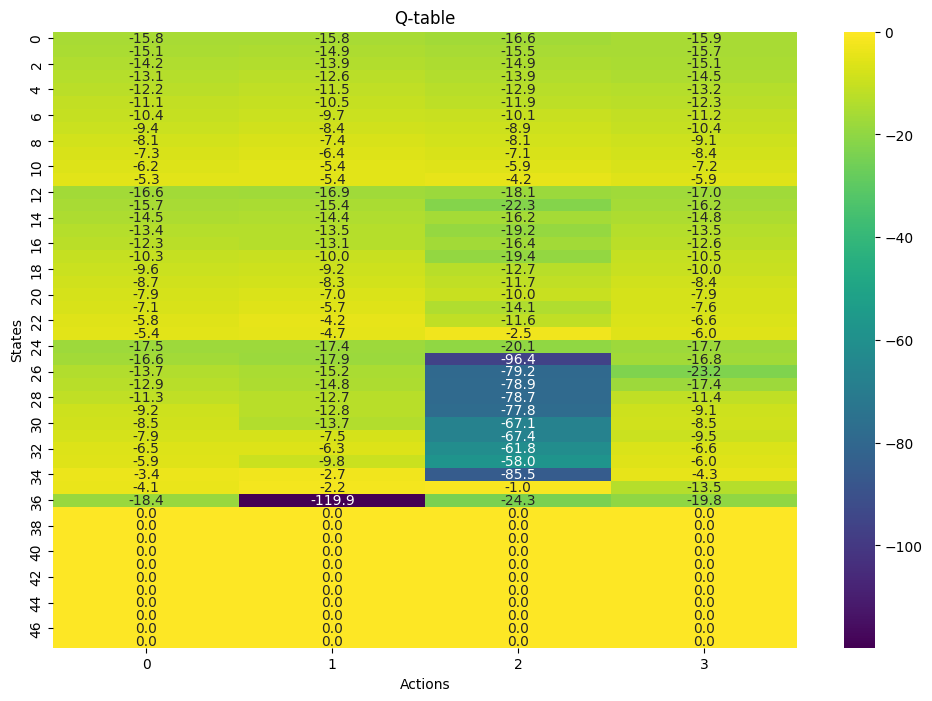

In [ ]:
plot_Q(Q)

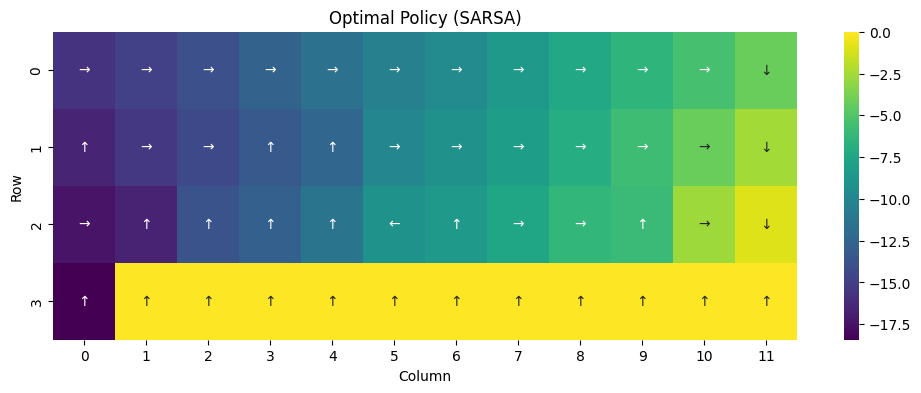

In [ ]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?
